In [1]:
# Импортируем необходимые библиотеки
import numpy as np # linear algebra
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import random

import datetime
now = datetime.datetime.now()

from scipy.stats import mode

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score

# Модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2, roc_auc_score

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
matplotlib.rcParams.update({'font.size': 14}) 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Пути к директориям и файлам

In [5]:
#TRAIN_DATASET_PATH = '/kaggle/input/real-estate-price-prediction-moscow/train.csv'
#TEST_DATASET_PATH = '/kaggle/input/real-estate-price-prediction-moscow/test.csv'

In [6]:
# Загружаем датасет
train_df = pd.read_csv('train.csv', sep = ',')
test_df = pd.read_csv('test.csv', sep = ',')

# Анализ данных

In [7]:
train_df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.000,115.027,nan,10.000,4,10.000,2014,0.075,B,B,11,3097,0,nan,0,0,B,305018.871
1,3013,22,1.000,39.833,23.169,8.000,7,8.000,1966,0.119,B,B,30,6207,1,1183.000,1,0,B,177734.553
2,8215,1,3.000,78.342,47.672,10.000,2,17.000,1988,0.026,B,B,33,5261,0,240.000,3,1,B,282078.721
3,2352,1,1.000,40.410,nan,1.000,10,22.000,1977,0.007,B,B,1,264,0,nan,0,1,B,168106.008
4,13866,94,2.000,64.285,38.563,9.000,16,16.000,1972,0.283,B,B,33,8667,2,nan,0,6,B,343995.103
5,5804,99,3.000,62.528,47.104,6.000,9,9.000,1972,0.012,B,B,35,5776,1,2078.000,2,4,B,161044.944
6,8864,44,1.000,33.939,21.773,9.000,1,12.000,1968,0.232,B,B,24,4860,1,80.000,0,3,B,142402.739
7,13072,59,2.000,50.392,32.893,8.000,8,17.000,1986,0.020,B,B,37,7687,11,176.000,5,5,B,326174.175
8,9951,1,1.000,46.888,44.628,1.000,12,20.000,1977,0.007,B,B,1,264,0,nan,0,1,B,160400.402
9,8094,6,3.000,79.867,75.085,1.000,3,17.000,2014,0.243,B,B,5,1564,0,540.000,0,0,B,194756.024


In [8]:
train_df .shape

(10000, 20)

In [9]:
train_df.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [11]:
# Видим, что у нас отсутствуют значения в признаках: LifeSquare, Healthcare_1. Впоследствии их заполним.

In [12]:
train_df ['Id'] = train_df ['Id'].astype(str)

### Анализ целевой переменной

In [13]:
train_df['Price'].describe()

count    10000.000
mean    214138.857
std      92872.294
min      59174.778
25%     153872.634
50%     192269.645
75%     249135.462
max     633233.467
Name: Price, dtype: float64

In [14]:
# Визуализируем данные и построим гистограмму

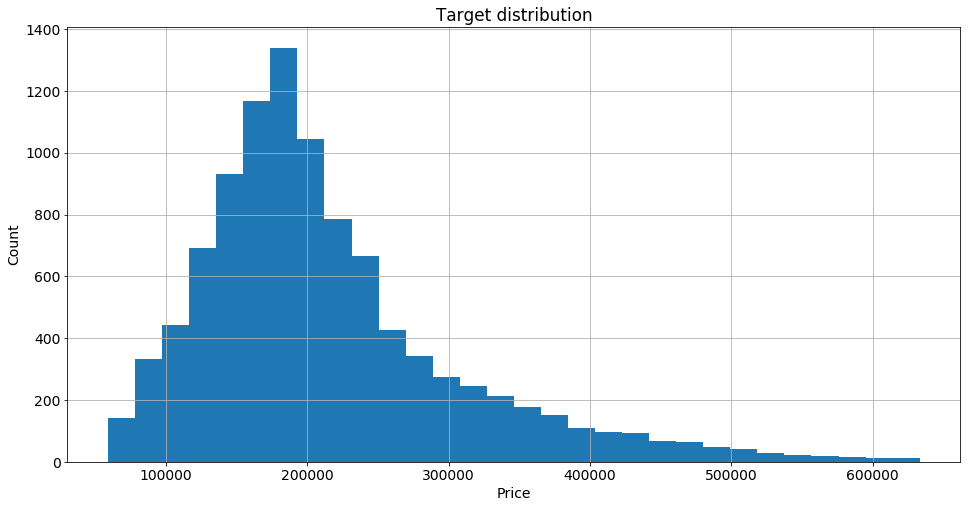

In [15]:
plt.figure(figsize = (16, 8))

train_df['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

In [16]:
# Можем наблюдать нормальное распределение: 
# график имеет больше показателей среднего значения и длинный "хвост" с высокими показателями "Price"

In [17]:
# Посмотрим меры центральной тенденции
target_mean = round(train_df['Price'].mean(), 2)
target_median = train_df['Price'].median()

In [18]:
# Для просмотра моды разобъём данные на кластеры, инчаче значение моды получится минимальным
target_bins = train_df['Price'] // 10000 * 10000
target_adjusted_mode = target_bins.mode()[0]
target_adjusted_mode

180000.0

In [19]:
#Визуализируем эти данные

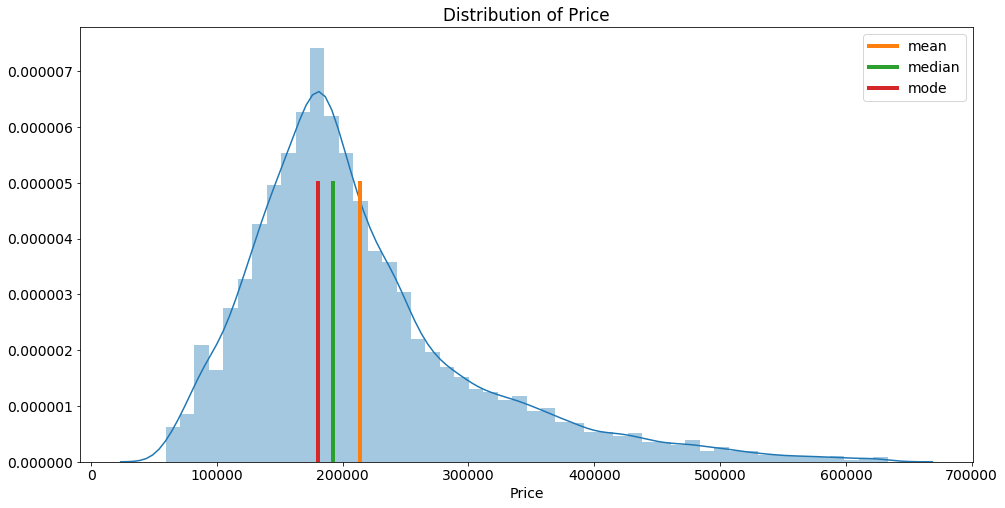

In [20]:
plt.figure(figsize = (16, 8))

sns.distplot(train_df['Price'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean',  linewidth=4)
plt.plot([target_median] * 10, y, label='median',  linewidth=4)
plt.plot([target_adjusted_mode] * 10, y, label='mode', linewidth=4)

plt.title('Distribution of Price')
plt.legend()
plt.show()

In [21]:
# Наблюдаем смещение среднего значения в сторону больших показателей цены, возможно в целевой переменной есть выбросы. 
# Я не буду обрабатывать колонку Price.

### Анализ количественных переменных

In [22]:
train_df.dtypes

Id                object
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [23]:
# Выделим количественные признаки в отдельный список. Остальные, на мой взгляд, больше подходят под категориальные,
# т.к. данные сгруппированы по определенным значениям.
amount_features = ['Square', 'LifeSquare']

In [24]:
df_num_features = train_df[amount_features]
df_num_features.describe()

,Square,LifeSquare
count,10000.000,7887.000
mean,56.316,37.200
std,21.059,86.241
min,1.137,0.371
25%,41.775,22.770
50%,52.513,32.781
75%,65.901,45.129
max,641.065,7480.592


In [25]:
# Видим, что данные имеют большое количество выбросов.
# Впоследтвии обработаем эти выбросы.

In [26]:
# Проанализируем завесимость таргета от количественных признаков

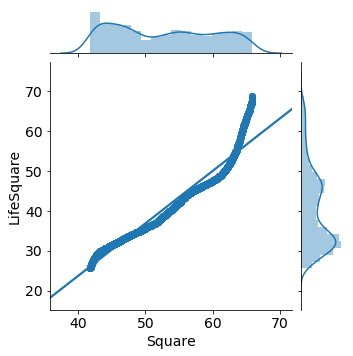

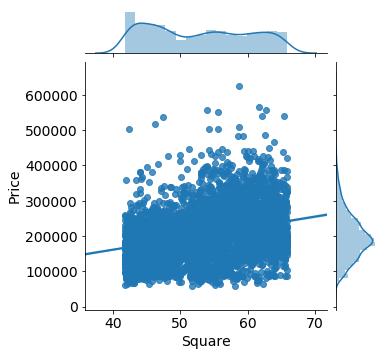

In [27]:
# Построим зависимость LifeSquare от Square и Price от Square, отбросив несколько значений с начала и конца выборки, 
# чтобы исключить некоторые выбросы

df_square = train_df[['Square', 'Price']].sort_values(by='Square')[2500:7500]
df_lifesquare = train_df[['LifeSquare', 'Price']].sort_values(by='LifeSquare')[2500:7500]

grid = sns.jointplot(df_square['Square'], df_lifesquare['LifeSquare'], kind='reg')
grid.fig.set_figwidth(5)
grid.fig.set_figheight(5)

grid = sns.jointplot(df_square['Square'], df_square['Price'], kind='reg')
grid.fig.set_figwidth(5)
grid.fig.set_figheight(5)

plt.show()

In [28]:
# Видим линейную зависимость жилой площади от общей площади помедения. 
# Я буду это использовать при отборе признаков для обучения модели: если модель будет переобучаться, один можно будет исключить.
# Зависимость цены от площади квартиры по графику оценить сложно.

### Анализ категориальных признаков

In [29]:
# Выделим категориальные признаки в отдельный список и посмотрим содержание некоторых колонок

cat_features = list(set(list(train_df.columns)) - set(amount_features))

df_cat_features = train_df[cat_features]        
df_cat_features.head(5)

,Floor,Social_1,HouseFloor,Healthcare_1,Helthcare_2,KitchenSquare,HouseYear,Shops_1,Shops_2,Id,Ecology_3,Ecology_1,Price,DistrictId,Social_2,Rooms,Ecology_2,Social_3
0,4,11,10.000,nan,0,10.000,2014,0,B,11809,B,0.075,305018.871,27,3097,3.000,B,0
1,7,30,8.000,1183.000,1,8.000,1966,0,B,3013,B,0.119,177734.553,22,6207,1.000,B,1
2,2,33,17.000,240.000,3,10.000,1988,1,B,8215,B,0.026,282078.721,1,5261,3.000,B,0
3,10,1,22.000,nan,0,1.000,1977,1,B,2352,B,0.007,168106.008,1,264,1.000,B,0
4,16,33,16.000,nan,0,9.000,1972,6,B,13866,B,0.283,343995.103,94,8667,2.000,B,2


In [30]:
train_df['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
62     247
30     228
58     179
53     174
21     165
52     143
8      142
11     129
46     119
61     118
45     116
74     114
34     111
57     107
44     104
99      97
101     97
47      97
13      97
7       92
48      90
29      89
94      89
41      87
3       82
      ... 
133      5
166      5
189      5
65       5
188      5
82       5
112      4
136      4
179      4
50       4
182      4
180      4
185      3
193      3
201      3
175      3
181      3
208      2
158      2
172      2
195      2
202      2
186      2
196      1
117      1
199      1
205      1
174      1
209      1
207      1
Name: DistrictId, Length: 205, dtype: int64

In [31]:
train_df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [32]:
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [33]:
train_df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

# Обработка выбросов

In [34]:
train_df.head(2)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.000,115.027,nan,10.000,4,10.000,2014,0.075,B,B,11,3097,0,nan,0,0,B,305018.871
1,3013,22,1.000,39.833,23.169,8.000,7,8.000,1966,0.119,B,B,30,6207,1,1183.000,1,0,B,177734.553


#### HouseYear

In [35]:
train_df['HouseYear'].describe()

count      10000.000
mean        3990.166
std       200500.261
min         1910.000
25%         1974.000
50%         1977.000
75%         2001.000
max     20052011.000
Name: HouseYear, dtype: float64

In [36]:
# Явно видим выбросы в признаке. Отберем все показатели с выбросами.
# Выберем все даты меньше 1900 года и больше настоящего.

In [37]:
train_df[(train_df['HouseYear'] < 1900) | (train_df['HouseYear'] > now.year)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8828,11607,147,2.000,44.792,28.360,5.000,4,9.000,4968,0.320,B,B,25,4756,16,2857.000,5,8,B,243028.603
9163,10814,109,1.000,37.265,20.240,9.000,9,12.000,20052011,0.136,B,B,30,6141,10,262.000,3,6,B,254084.534


In [38]:
# Обработаем их, предполагая, что человек ввёл неверные данные
# В функции вынесем немного другую логику, т.к. точечно обработать тестовый датасет не получится

In [39]:
train_df.replace(
    {'HouseYear':
     {4968: 1968}
    },
    inplace=True)

train_df.replace(
    {'HouseYear':
     {20052011: 2011}
    },
    inplace=True)

#### Rooms

In [40]:
train_df['Rooms'].value_counts()

2.000     3880
1.000     3705
3.000     2235
4.000      150
5.000       18
0.000        8
10.000       2
19.000       1
6.000        1
Name: Rooms, dtype: int64

In [41]:
# Данные, где квартиры больше, чем с 5 комнатами будем считать ошибочными. Отметим их в отдельном столбце.

In [42]:
train_df['Rooms_outlier'] = 0
train_df.loc[(train_df['Rooms'] == 0) | (train_df['Rooms'] >= 6), 'Rooms_outlier'] = 1
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier
0,11809,27,3.000,115.027,nan,10.000,4,10.000,2014,0.075,...,B,11,3097,0,nan,0,0,B,305018.871,0
1,3013,22,1.000,39.833,23.169,8.000,7,8.000,1966,0.119,...,B,30,6207,1,1183.000,1,0,B,177734.553,0
2,8215,1,3.000,78.342,47.672,10.000,2,17.000,1988,0.026,...,B,33,5261,0,240.000,3,1,B,282078.721,0
3,2352,1,1.000,40.410,nan,1.000,10,22.000,1977,0.007,...,B,1,264,0,nan,0,1,B,168106.008,0
4,13866,94,2.000,64.285,38.563,9.000,16,16.000,1972,0.283,...,B,33,8667,2,nan,0,6,B,343995.103,0


In [43]:
train_df.loc[train_df['Rooms'] == 0, 'Rooms'] = 1
train_df.loc[train_df['Rooms'] >= 6, 'Rooms'] = train_df['Rooms'].mode()[0]

In [44]:
train_df['Rooms'].value_counts()

2.000    3884
1.000    3713
3.000    2235
4.000     150
5.000      18
Name: Rooms, dtype: int64

#### Square

In [45]:
train_df['Square'].describe()

count   10000.000
mean       56.316
std        21.059
min         1.137
25%        41.775
50%        52.513
75%        65.901
max       641.065
Name: Square, dtype: float64

In [46]:
train_df.loc[train_df['Square'] < 8, 'Square'] = train_df['Square'].median()
# Самая маленькая площадь квартиры в Москве - 8 кв. м.

In [47]:
train_df['Square'].describe()

count   10000.000
mean       56.374
std        20.980
min        13.785
25%        41.794
50%        52.514
75%        65.901
max       641.065
Name: Square, dtype: float64

#### LifeSquare

In [48]:
train_df['LifeSquare'].describe()

count   7887.000
mean      37.200
std       86.241
min        0.371
25%       22.770
50%       32.781
75%       45.129
max     7480.592
Name: LifeSquare, dtype: float64

In [49]:
# Показатели жилой площади не могут превышать или быть ниже данных общей площади. 
# Заменим такие данные на медиану.

In [50]:
train_df.loc[train_df['LifeSquare'] < 6, 'LifeSquare'] = train_df['LifeSquare'].median()
train_df.loc[train_df['LifeSquare'] > 641, 'LifeSquare'] = train_df['LifeSquare'].median()

In [51]:
train_df['LifeSquare'].describe()

count   7887.000
mean      37.014
std       19.567
min        8.823
25%       23.445
50%       32.781
75%       45.125
max      638.163
Name: LifeSquare, dtype: float64

#### KitchenSquare

In [52]:
train_df['KitchenSquare'].describe()

count   10000.000
mean        6.273
std        28.561
min         0.000
25%         1.000
50%         6.000
75%         9.000
max      2014.000
Name: KitchenSquare, dtype: float64

In [53]:
train_df['KitchenSquare'].value_counts()

1.000       2460
8.000       1306
5.000       1169
10.000      1075
6.000       1038
9.000        843
0.000        697
7.000        609
12.000       249
11.000       233
13.000        67
14.000        51
4.000         39
15.000        31
3.000         22
16.000        16
20.000        14
17.000        12
19.000        11
18.000         6
2.000          4
22.000         3
43.000         2
112.000        2
41.000         2
32.000         2
58.000         2
25.000         2
37.000         2
30.000         2
51.000         2
40.000         1
96.000         1
48.000         1
72.000         1
73.000         1
2014.000       1
66.000         1
36.000         1
78.000         1
54.000         1
29.000         1
31.000         1
35.000         1
62.000         1
39.000         1
1970.000       1
60.000         1
75.000         1
26.000         1
21.000         1
84.000         1
63.000         1
123.000        1
53.000         1
42.000         1
23.000         1
27.000         1
Name: KitchenS

In [54]:
# Чтобы обработать выбросы в данных площади кухни, воспользуемся квантилями.

In [55]:
train_df['KitchenSquare'].quantile(.975), train_df['KitchenSquare'].quantile(.025)

(13.0, 0.0)

In [56]:
# Если размер кухни превышает квантиль 0.975 или же меньше 3 кв.м., заменим его на медиану.
# Пользуюсь медианой, как более устойчивой к выбросам

In [57]:
condition = (train_df['KitchenSquare'].isna()) \
             | (train_df['KitchenSquare'] > train_df['KitchenSquare'].quantile(.975))
        
train_df.loc[condition, 'KitchenSquare'] = train_df['KitchenSquare'].median()

train_df.loc[train_df['KitchenSquare'] < 3, 'KitchenSquare'] = train_df['KitchenSquare'].median()

In [58]:
train_df['KitchenSquare'].value_counts()

6.000     4388
8.000     1306
5.000     1169
10.000    1075
9.000      843
7.000      609
12.000     249
11.000     233
13.000      67
4.000       39
3.000       22
Name: KitchenSquare, dtype: int64

#### HouseFloor, Floor

In [59]:
train_df['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

In [60]:
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int64)

In [61]:
# Самый высокий жилой дом в Москве - 58 этажей. Всё, что выше, будем считать выбросом и заменим на моду.

In [62]:
train_df.loc[train_df['HouseFloor'] > 58, 'HouseFloor'] = train_df['HouseFloor'].mode()[0]

In [63]:
# В одном наблюдении показатель этажа не может превышать общее количество этажей в доме. 
# Выберем эти данные и отметим их как выбросы в отдельном столбце.
# Также отметим и квартиры и дома с показателем этажа 0.

In [64]:
(train_df['Floor'] > train_df['HouseFloor']).sum()

1825

In [65]:
train_df['HouseFloor_outlier'] = 0
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
train_df.loc[train_df['Floor'] > train_df['HouseFloor'], 'HouseFloor_outlier'] = 1

In [66]:
# Заполним нулевые показатели медианой.

In [67]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].median()

In [68]:
# Если этаж квартиры превышает этажность дома, назначим случайный этаж в пределах допустимых значений.

In [69]:
floor_outliers = train_df.loc[train_df['Floor'] > train_df['HouseFloor']].index
floor_outliers

Int64Index([  17,   19,   21,   25,   26,   33,   34,   37,   39,   44,
            ...
            9913, 9921, 9930, 9931, 9938, 9953, 9960, 9968, 9970, 9975],
           dtype='int64', length=1610)

In [70]:
train_df.loc[floor_outliers, 'Floor'] = train_df.loc[floor_outliers, 'HouseFloor']\
                                                .apply(lambda x: random.randint(1, x))

In [71]:
(train_df['Floor'] > train_df['HouseFloor']).sum()

0

# Обработка пропусков

In [72]:
train_df.isna().sum()

Id                       0
DistrictId               0
Rooms                    0
Square                   0
LifeSquare            2113
KitchenSquare            0
Floor                    0
HouseFloor               0
HouseYear                0
Ecology_1                0
Ecology_2                0
Ecology_3                0
Social_1                 0
Social_2                 0
Social_3                 0
Healthcare_1          4798
Helthcare_2              0
Shops_1                  0
Shops_2                  0
Price                    0
Rooms_outlier            0
HouseFloor_outlier       0
dtype: int64

In [73]:
train_df[['Square', 'LifeSquare', 'KitchenSquare']].head(10)

,Square,LifeSquare,KitchenSquare
0,115.027,nan,10.000
1,39.833,23.169,8.000
2,78.342,47.672,10.000
3,40.410,nan,6.000
4,64.285,38.563,9.000
5,62.528,47.104,6.000
6,33.939,21.773,9.000
7,50.392,32.893,8.000
8,46.888,44.628,6.000
9,79.867,75.085,6.000


#### LifeSquare

In [74]:
# Чтобы более качественно заполнить пропуски в показателе жилой площади, вспомним, 
# что LifeSquare находится в линейной зависимости от Square

In [75]:
train_df['LifeSquare_nan'] = train_df['LifeSquare'].isna() * 1

condition = (train_df['LifeSquare'].isna()) \
             & (~train_df['Square'].isna()) \
             & (~train_df['KitchenSquare'].isna())

In [76]:
# Построим график зависимости, отбросив значения с Nan.

In [77]:
df_LSquare_Square = train_df[['LifeSquare', 'Square']].sort_values(by='LifeSquare')[:(10000 - 2113)]

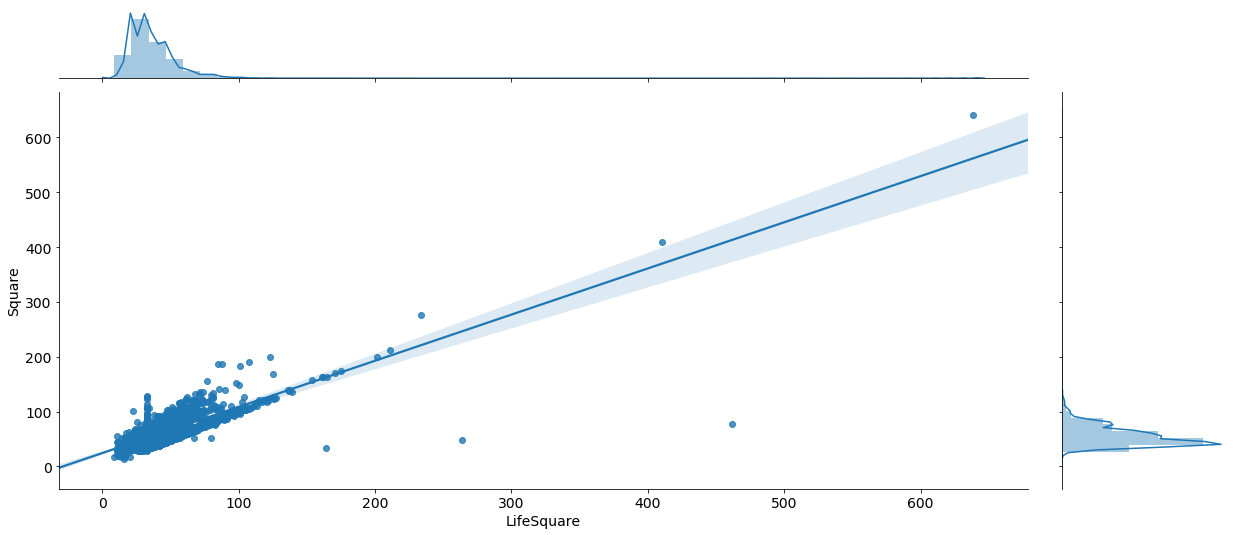

In [78]:
grid = sns.jointplot( df_LSquare_Square['LifeSquare'], df_LSquare_Square['Square'], kind='reg')
grid.fig.set_figwidth(20)
grid.fig.set_figheight(8)

plt.show()

In [79]:
# Формула линейной зависимости на плоскости: y = kx + b. Число b примем равное 0, т.к. смещение графика относительно 0 небольшое
# Рассчитаем коэффициент для каждого отношения Square и LifeSquare и найдём медиану.

In [80]:
k = train_df['Square'] / train_df['LifeSquare']
k_median = k.median()
k_median

1.612521738760921

In [81]:
# Заполним пропуски, используя коэффициент

In [82]:
train_df['LifeSquare'] = train_df['LifeSquare'].fillna(train_df['Square'] / k_median)

In [83]:
train_df['LifeSquare'].isna().sum()

0

#### Healthcare_1

In [84]:
train_df.drop('Healthcare_1', axis=1, inplace=True)

In [85]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.mode=None
        self.medians=None
        self.kitchen_square_quantile = None
        
    def fit(self, X):
        """Сохранение статистик"""       
        # Расчет медиан
        self.mode = X.mode()
        self.medians = X.median()
        self.kitchen_square_quantile = X['KitchenSquare'].quantile(.975)
        
    
    def transform(self, X):
        """Трансформация данных"""

        # Rooms
        X['Rooms_outlier'] = 0
        X.loc[(X['Rooms'] == 0) | (X['Rooms'] >= 6), 'Rooms_outlier'] = 1
        
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] >= 6, 'Rooms'] = self.mode['Rooms'][0]
        
        #Square
        X.loc[X['Square'] < 8, 'Square'] = self.medians['Square']
        
               
        # KitchenSquare
        condition = (X['KitchenSquare'].isna()) \
                    | (X['KitchenSquare'] > self.kitchen_square_quantile)
        
        X.loc[condition, 'KitchenSquare'] = self.medians['KitchenSquare']

        X.loc[X['KitchenSquare'] < 3, 'KitchenSquare'] = self.medians['KitchenSquare']
        
        # HouseFloor, Floor
        X.loc[X['HouseFloor'] > 58, 'HouseFloor'] = X['HouseFloor'].mode()[0]
        X['HouseFloor_outlier'] = 0
        X.loc[X['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
        X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor_outlier'] = 1
        
        X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = self.medians['HouseFloor']
        
        floor_outliers = X.loc[X['Floor'] > X['HouseFloor']].index
        X.loc[floor_outliers, 'Floor'] = X.loc[floor_outliers, 'HouseFloor']\
                                            .apply(lambda x: random.randint(1, x))
        
        # HouseYear
        current_year = now.year
        
        X['HouseYear_outlier'] = 0
        X.loc[X['HouseYear'] > current_year, 'HouseYear_outlier'] = 1
        
        X.loc[X['HouseYear'] > current_year, 'HouseYear'] = current_year
        
        # Healthcare_1
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)
            
        # LifeSquare
        X.loc[X['LifeSquare'] < 6, 'LifeSquare'] = self.medians['LifeSquare']
        X.loc[X['LifeSquare'] > train_df['Square'].max(), 'LifeSquare'] = self.medians['LifeSquare']
        
        X['LifeSquare_nan'] = X['LifeSquare'].isna() * 1
        k = X['Square'] / X['LifeSquare']
        k_median = k.median()
        X['LifeSquare'] = X['LifeSquare'].fillna(X['Square'] / k_median)
        
        
        
        
        X.fillna(self.medians, inplace=True)
        
        return X

# Построение новых признаков

#### Dummies

In [86]:
# Преобразуем признаки с двумя переменными A, B в бинарные: 0 и 1

In [87]:
binary_to_numbers = {'A': 0, 'B': 1}

train_df['Ecology_2'] = train_df['Ecology_2'].replace(binary_to_numbers)
train_df['Ecology_3'] = train_df['Ecology_3'].replace(binary_to_numbers)
train_df['Shops_2'] = train_df['Shops_2'].replace(binary_to_numbers)

#### DistrictSize, IsDistrictLarge

In [88]:
# Мне очень понравился признак, расмотренный на занятии DistrictSize и следующий из него IsDistrictLarge и MedPriceByDistrict
# Я тоже их создам

In [89]:
district_size = train_df['DistrictId'].value_counts().reset_index()\
                    .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

district_size.head()

,DistrictId,DistrictSize
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294


In [90]:
train_df = train_df.merge(district_size, on='DistrictId', how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,HouseFloor_outlier,LifeSquare_nan,DistrictSize
0,11809,27,3.000,115.027,71.334,10.000,4,10.000,2014,0.075,...,3097,0,0,0,1,305018.871,0,0,1,851
1,3013,22,1.000,39.833,23.169,8.000,7,8.000,1966,0.119,...,6207,1,1,0,1,177734.553,0,0,0,78
2,8215,1,3.000,78.342,47.672,10.000,2,17.000,1988,0.026,...,5261,0,3,1,1,282078.721,0,0,0,652
3,2352,1,1.000,40.410,25.060,6.000,10,22.000,1977,0.007,...,264,0,0,1,1,168106.008,0,0,1,652
4,13866,94,2.000,64.285,38.563,9.000,16,16.000,1972,0.283,...,8667,2,0,6,1,343995.103,0,0,0,89


In [91]:
(train_df['DistrictSize'] > 100).value_counts()

True     5069
False    4931
Name: DistrictSize, dtype: int64

In [92]:
train_df['IsDistrictLarge'] = (train_df['DistrictSize'] > 100).astype(int)

In [93]:
train_df.isna().sum()

Id                    0
DistrictId            0
Rooms                 0
Square                0
LifeSquare            0
KitchenSquare         0
Floor                 0
HouseFloor            0
HouseYear             0
Ecology_1             0
Ecology_2             0
Ecology_3             0
Social_1              0
Social_2              0
Social_3              0
Helthcare_2           0
Shops_1               0
Shops_2               0
Price                 0
Rooms_outlier         0
HouseFloor_outlier    0
LifeSquare_nan        0
DistrictSize          0
IsDistrictLarge       0
dtype: int64

#### MedPriceByDistrict

In [94]:
med_price_by_district = train_df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                            .rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district.head()

,DistrictId,Rooms,MedPriceByDistrict
0,0,1.000,142799.434
1,0,2.000,176210.812
2,0,3.000,300610.359
3,1,1.000,146735.672
4,1,2.000,202666.310


In [95]:
train_df = train_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,HouseFloor_outlier,LifeSquare_nan,DistrictSize,IsDistrictLarge,MedPriceByDistrict
0,11809,27,3.000,115.027,71.334,10.000,4,10.000,2014,0.075,...,0,0,1,305018.871,0,0,1,851,1,213530.788
1,3013,22,1.000,39.833,23.169,8.000,7,8.000,1966,0.119,...,1,0,1,177734.553,0,0,0,78,0,146032.830
2,8215,1,3.000,78.342,47.672,10.000,2,17.000,1988,0.026,...,3,1,1,282078.721,0,0,0,652,1,244005.272
3,2352,1,1.000,40.410,25.060,6.000,10,22.000,1977,0.007,...,0,1,1,168106.008,0,0,1,652,1,146735.672
4,13866,94,2.000,64.285,38.563,9.000,16,16.000,1972,0.283,...,0,6,1,343995.103,0,0,0,89,0,201584.441


In [96]:
train_df.isna().sum()

Id                    0
DistrictId            0
Rooms                 0
Square                0
LifeSquare            0
KitchenSquare         0
Floor                 0
HouseFloor            0
HouseYear             0
Ecology_1             0
Ecology_2             0
Ecology_3             0
Social_1              0
Social_2              0
Social_3              0
Helthcare_2           0
Shops_1               0
Shops_2               0
Price                 0
Rooms_outlier         0
HouseFloor_outlier    0
LifeSquare_nan        0
DistrictSize          0
IsDistrictLarge       0
MedPriceByDistrict    0
dtype: int64

#### isSmallSize, isMediumSize, isBigSize

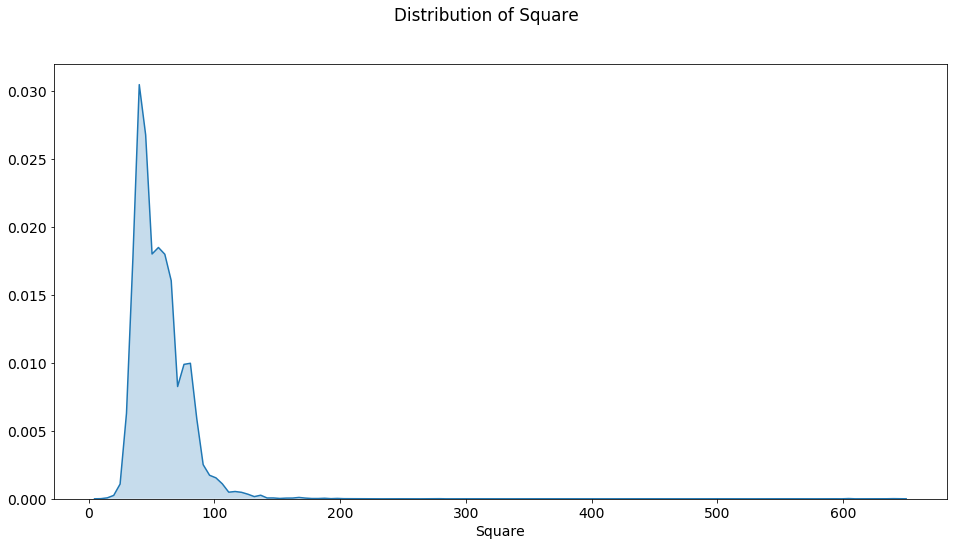

In [97]:
plt.figure(figsize = (16, 8))

sns.kdeplot(train_df['Square'] , shade=True, legend=False)
plt.xlabel('Square')

plt.suptitle('Distribution of Square')
plt.show()

In [98]:
# Если смотреть на количество данных о площади помещений, можно заметить 3 группы, где количество наблюдений имеют пики.
# Из количественного признака создадим категориальные: isSmallSize, isMediumSize, isBigSize, в зависимости от площади помещения
# Создадим дамми-переменные

In [99]:
train_df['isSmallSize'] = (train_df['Square'] <= 50) * 1
train_df['isMediumSize'] = ((train_df['Square'] >= 51) & (train_df['Square'] < 60)) * 1
train_df['isBigSize'] = (train_df['Square'] >= 61) * 1

#### bild_new, bild_middle_age, bild_old, bild_very_old

In [100]:
# Мы легко можем подсчитать возраст дома в наблюдениях:

In [101]:
HouseAge_df = now.year - train_df['HouseYear']

In [102]:
HouseAge_df.sort_values().unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  72,  73,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92, 101, 102, 103,
       104, 106, 108, 110], dtype=int64)

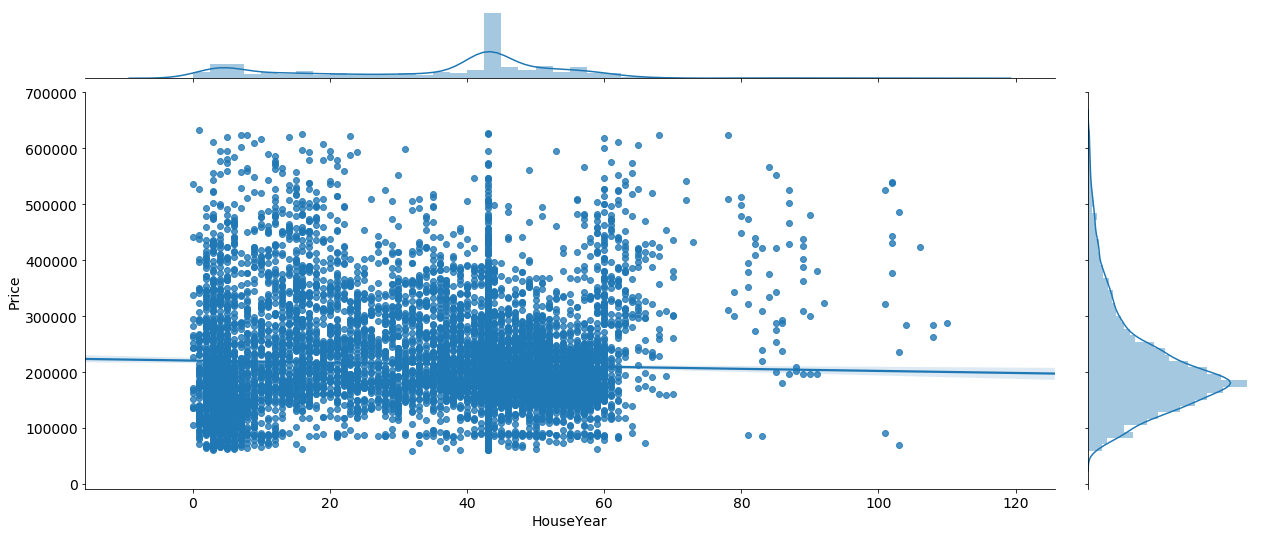

In [103]:
grid = sns.jointplot(HouseAge_df, train_df['Price'], kind='reg')
grid.fig.set_figwidth(20)
grid.fig.set_figheight(8)

plt.show()

In [104]:
# На графике я вижу 4 группы точек, где разнятся максимальные показатели цены, количество наблюдений в зависимости от
# возраста домов.
# Сделаем разбивку на эти группы и снова создадим дамми-переменные

In [105]:
train_df['bild_new'] = (HouseAge_df <= 13) * 1
train_df['bild_middle_age'] = ((HouseAge_df > 13) & (HouseAge_df <= 30)) * 1
train_df['bild_old'] = ((HouseAge_df > 30) & (HouseAge_df <= 50)) * 1
train_df['bild_very_old'] = (HouseAge_df > 50) * 1

#### Social, MedPriceBySocial

In [106]:
# Признаки Social_1, Social_2, Social_3 по моим предположениям, связаны. Объединим их в один признак Social.

In [107]:
train_df['Social'] = (train_df['Social_1'] + train_df['Social_2'] + train_df['Social_3']) / 3

In [108]:
# Я предполагаю, что район, где расположена квартира, и социальные показатели связаны. 
# Определим средний показатель цены, исходя из района и социальной обстановки.

In [109]:
med_price_by_social = train_df.groupby(['DistrictId', 'Social'], as_index=False).agg({'Price':'median'})\
                            .rename(columns={'Price':'MedPriceBySocial'})

med_price_by_social.head()

,DistrictId,Social,MedPriceBySocial
0,0,1599.000,173146.324
1,0,1771.667,162985.117
2,1,88.333,183882.807
3,1,254.667,105341.507
4,1,441.667,145304.774


In [110]:
train_df = train_df.merge(med_price_by_social, on=['DistrictId', 'Social'], how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,MedPriceByDistrict,isSmallSize,isMediumSize,isBigSize,bild_new,bild_middle_age,bild_old,bild_very_old,Social,MedPriceBySocial
0,11809,27,3.000,115.027,71.334,10.000,4,10.000,2014,0.075,...,213530.788,0,0,1,1,0,0,0,1036.000,148315.419
1,3013,22,1.000,39.833,23.169,8.000,7,8.000,1966,0.119,...,146032.830,1,0,0,0,0,0,1,2079.333,186161.901
2,8215,1,3.000,78.342,47.672,10.000,2,17.000,1988,0.026,...,244005.272,0,0,1,0,0,1,0,1764.667,203858.096
3,2352,1,1.000,40.410,25.060,6.000,10,22.000,1977,0.007,...,146735.672,1,0,0,0,0,1,0,88.333,183882.807
4,13866,94,2.000,64.285,38.563,9.000,16,16.000,1972,0.283,...,201584.441,0,0,1,0,0,1,0,2900.667,201584.441


In [111]:
class FeatureGenetator():
    """Генерация новых фич"""
    
    def __init__(self):
        self.DistrictId_counts = None
        self.binary_to_numbers = None
        self.med_price_by_district = None
        self.med_price_by_floor_year = None
        self.med_price_by_social = None
        self.house_year_max = None
        self.floor_max = None
        self.HouseAge_df = None
        
    def fit(self, X, y=None):
        
        X = X.copy()
        
        # Binary features
        self.binary_to_numbers = {'A': 0, 'B': 1}
        
        # DistrictID
        self.district_size = X['DistrictId'].value_counts().reset_index() \
                               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
        
                
        # Target encoding
        ## District, Rooms
        df = X.copy()
        
            
        self.med_price_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                                            .rename(columns={'Price':'MedPriceByDistrict'})
            
        self.med_price_by_district_median = self.med_price_by_district['MedPriceByDistrict'].median()
        
        #Social
        
        ## District, Social        
       
        df['Social'] = (df['Social_1'] + df['Social_2'] + df['Social_3']) / 3
        
        self.med_price_by_social = df.groupby(['DistrictId', 'Social'], as_index=False).agg({'Price':'median'})\
                            .rename(columns={'Price':'MedPriceBySocial'})
        
        self.med_price_by_social_median = self.med_price_by_social['MedPriceBySocial'].median()
            
        ## floor, year
        if y is not None:
            self.floor_max = df['Floor'].max()
            self.house_year_max = df['HouseYear'].max()
            df['Price'] = y.values
            
        
        # Houses Ages
        self.HouseAge_df = now.year - X['HouseYear']

        
    def transform(self, X):
        
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)  # self.binary_to_numbers = {'A': 0, 'B': 1}
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        
        # DistrictId, IsDistrictLarge
        X = X.merge(self.district_size, on='DistrictId', how='left')
        
        X['new_district'] = 0
        X.loc[X['DistrictSize'].isna(), 'new_district'] = 1
        
        X['DistrictSize'].fillna(5, inplace=True)
        
        X['IsDistrictLarge'] = (X['DistrictSize'] > 100).astype(int)
        
        # Size
        X['isSmallSize'] = (X['Square'] <= 50) * 1
        X['isMediumSize'] = ((X['Square'] >= 51) & (X['Square'] < 60)) * 1
        X['isBigSize'] = (X['Square'] >= 61) * 1
        
        # Houses ages
        X['bild_new'] = (self.HouseAge_df <= 13) * 1
        X['bild_middle_age'] = ((self.HouseAge_df > 13) & (self.HouseAge_df <= 30)) * 1
        X['bild_old'] = ((self.HouseAge_df > 30) & (self.HouseAge_df <= 50)) * 1
        X['bild_very_old'] = (self.HouseAge_df > 50) * 1

        # Target encoding
        if self.med_price_by_district is not None:
            X = X.merge(self.med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
            X.fillna(self.med_price_by_district_median, inplace=True)
            
        X['Social'] = (X['Social_1'] + X['Social_2'] + X['Social_3']) / 3    
        if self.med_price_by_social is not None:
            X = X.merge(med_price_by_social, on=['DistrictId', 'Social'], how='left')
            X.fillna(self.med_price_by_social_median, inplace=True)  
        
        return X

# Матрица корреляций

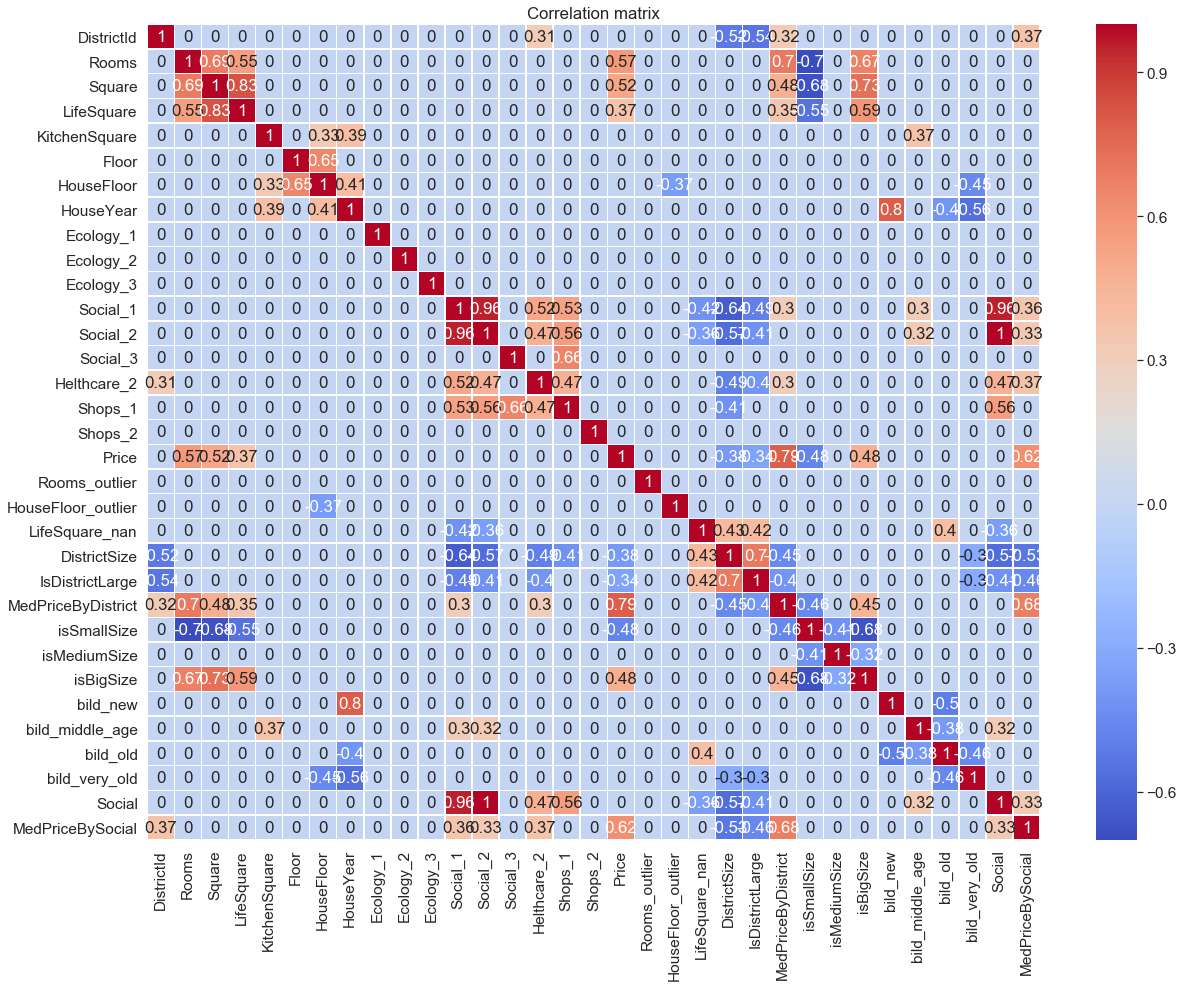

In [112]:
plt.figure(figsize = (20,15))

sns.set(font_scale=1.4)

corr_matrix = train_df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [113]:
# На матрице хорошо видна корреляция цены с такими признаками, как 
# Rooms, Square, LifeSquare, MedianPriceByDistrict и MedianPriceBySocial
# Также есть корреляция у признаков, не связанных с ценой.
# Впоследствии можно убрать часть таких признаков, чтобы не допустить сильного переобучения.

# Подготовка данных

In [114]:
train_df = pd.read_csv('train.csv', sep = ',')
test_df = pd.read_csv('test.csv', sep = ',')
#train_df = pd.read_csv(TRAIN_DATASET_PATH)
#test_df = pd.read_csv(TEST_DATASET_PATH)

preprocessor = DataPreprocessing()
preprocessor.fit(train_df)

train_df = preprocessor.transform(train_df)
test_df = preprocessor.transform(test_df)
train_df.shape, test_df.shape

((10000, 23), (5000, 22))

In [115]:
features_gen = FeatureGenetator()
features_gen.fit(train_df)

In [116]:
train_df = features_gen.transform(train_df)
test_df = features_gen.transform(test_df)
train_df.shape, test_df.shape

((10000, 36), (5000, 35))

In [117]:
train_df.isna().sum().sum(), test_df.isna().sum().sum()

(0, 0)

# Отбор признаков

In [118]:
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Rooms_outlier',
 'HouseFloor_outlier',
 'HouseYear_outlier',
 'LifeSquare_nan',
 'DistrictSize',
 'new_district',
 'IsDistrictLarge',
 'isSmallSize',
 'isMediumSize',
 'isBigSize',
 'bild_new',
 'bild_middle_age',
 'bild_old',
 'bild_very_old',
 'MedPriceByDistrict',
 'Social',
 'MedPriceBySocial']

In [119]:
# После нескольких тестов лучший результат получился, когда были убраны следующие признаки:
#'Rooms', 
#'LifeSquare', 

feature_names = ['Square', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                 'Helthcare_2', 'Shops_1', 'Shops_2']

new_feature_names = ['Rooms_outlier', 'HouseFloor_outlier', 'HouseYear_outlier', 'LifeSquare_nan', 'DistrictSize',
                     'new_district', 'IsDistrictLarge',  'MedPriceByDistrict', 'isSmallSize', 'isMediumSize', 'isBigSize',
                     'bild_new', 'bild_middle_age', 'bild_old', 'bild_very_old', 'Social', 'MedPriceBySocial']

target_name = 'Price'

In [120]:
#df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8', sep=';')

# Разбиение на train / test

In [121]:
X = train_df[feature_names + new_feature_names]
y = train_df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

In [122]:
X.head()

,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,...,MedPriceByDistrict,isSmallSize,isMediumSize,isBigSize,bild_new,bild_middle_age,bild_old,bild_very_old,Social,MedPriceBySocial
0,115.027,10.000,4,10.000,2014,0.075,1,1,11,3097,...,213530.788,0,0,1,1,0,0,0,1036.000,148315.419
1,39.833,8.000,7,8.000,1966,0.119,1,1,30,6207,...,146032.830,1,0,0,0,0,0,1,2079.333,186161.901
2,78.342,10.000,2,17.000,1988,0.026,1,1,33,5261,...,244005.272,0,0,1,0,0,1,0,1764.667,203858.096
3,40.410,6.000,10,22.000,1977,0.007,1,1,1,264,...,146735.672,1,0,0,0,0,1,0,88.333,183882.807
4,64.285,9.000,16,16.000,1972,0.283,1,1,33,8667,...,201584.441,0,0,1,0,0,1,0,2900.667,201584.441


In [123]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

### GradientBoostingRegressor

In [124]:
# GradientBoostingRegressor показала лучший результат

R2:	0.803
RMSE:	40473.883
MSE:	1638135217.945


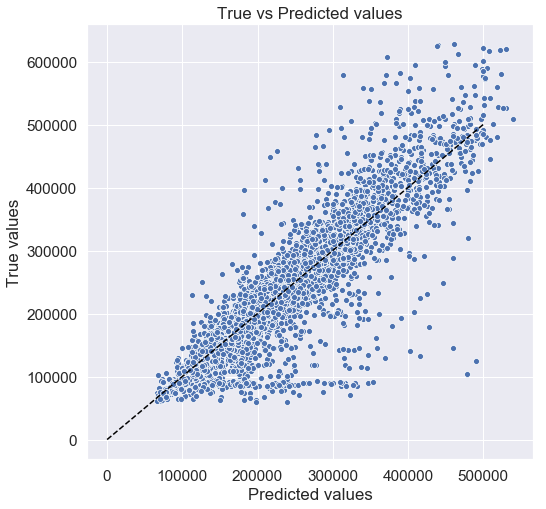

In [125]:
gb_model = GradientBoostingRegressor(criterion='friedman_mse',
                                     max_depth=5,                                     
                                     random_state=42,  
                                     n_estimators=110,
                                     loss='huber',
                                     min_weight_fraction_leaf=0.02,
                                     
                                     )
gb_model.fit(X_train, y_train)

y_train_preds = gb_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.756
RMSE:	47413.429
MSE:	2248033288.863


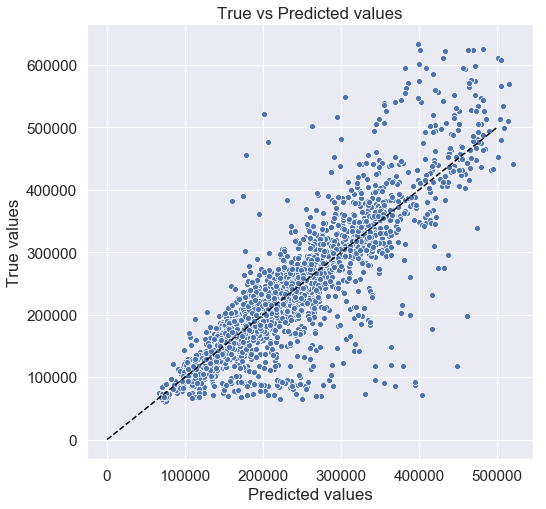

In [126]:
y_test_preds = gb_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

# Кросс-валидация

In [127]:
cv_score = cross_val_score(gb_model, X, y, scoring='r2', cv=KFold(n_splits=5, shuffle=True, random_state=21))
cv_score

array([0.77511576, 0.74422483, 0.74599287, 0.76204483, 0.79502188])

In [128]:
cv_score.mean()

0.7644800343374953

# Важность признака

In [129]:
feature_importances = pd.DataFrame(zip(X_train.columns, gb_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
21,MedPriceByDistrict,0.754
0,Square,0.091
30,MedPriceBySocial,0.080
1,KitchenSquare,0.011
3,HouseFloor,0.011
4,HouseYear,0.010
18,DistrictSize,0.010
10,Social_3,0.008
8,Social_1,0.006
2,Floor,0.005


# Прогнозирование на тестовом датасете

In [130]:
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,isSmallSize,isMediumSize,isBigSize,bild_new,bild_middle_age,bild_old,bild_very_old,MedPriceByDistrict,Social,MedPriceBySocial
0,4567,44,1.000,36.848,19.094,5.000,5,9.000,1970,0.036,...,1,0,0,1,0,0,0,171145.169,1467.333,201895.819
1,5925,62,1.000,42.494,42.568,10.000,7,17.000,2017,0.072,...,1,0,0,0,0,0,1,129107.219,210.667,157190.771
2,960,27,2.000,59.464,36.972,9.000,19,19.000,1977,0.211,...,0,1,0,0,0,1,0,165683.085,633.667,117527.890
3,3848,23,3.000,49.646,33.894,6.000,2,2.000,1965,0.014,...,1,0,0,0,0,1,0,166687.736,159.000,118250.845
4,746,74,1.000,53.837,33.474,6.000,8,17.000,1977,0.309,...,0,1,0,0,0,1,0,165071.826,2584.667,179291.592


In [131]:
submit = pd.read_csv('sample_submission.csv')
submit.head()

,Id,Price
0,4567,200000.000
1,5925,200000.000
2,960,200000.000
3,3848,200000.000
4,746,200000.000


In [132]:
predictions = gb_model.predict(test_df[feature_names + new_feature_names])
predictions

array([165668.81299925, 119898.37424915, 145579.39750086, ...,
       141838.91378572, 179810.15854523, 255920.32479302])

In [133]:
submit['Price'] = predictions
submit.head()

,Id,Price
0,4567,165668.813
1,5925,119898.374
2,960,145579.398
3,3848,137405.228
4,746,171052.769


In [134]:
#submit.to_csv('gb_submit.csv', index=False)